In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

## Task 1-1

In [2]:
np.random.seed(0)
n_candidate = 10000

V = np.zeros(n_candidate)
for i in range(n_candidate):
    x = np.random.binomial(1, 0.5, size=100)
    V[i] = np.sum(x)
(mean_V, std_V) = (np.mean(V), np.std(V))
    
# binomial probability law
binomial = np.random.binomial(100, 0.5, size=n_candidate)

# normal (Gaussian) approximation
normal = np.linspace(norm.ppf(0.0001, 50, 5), norm.ppf(0.9999, 50, 5), 50)

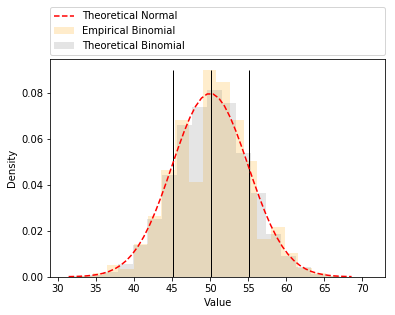

In [3]:
kwargs = dict(histtype='stepfilled', alpha=0.2, bins=20, edgecolor='None', density=True)

plt.hist(V, color='orange', label='Empirical Binomial', **kwargs)
plt.hist(binomial, color='grey', label='Theoretical Binomial', **kwargs)
plt.plot(normal, norm.pdf(normal, 50, 5), 'r--', label = 'Theoretical Normal')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

plt.vlines(x=mean_V, ymin=0, ymax=0.09, linewidth=1)
plt.vlines(x=mean_V - std_V, ymin=0, ymax=0.09, linewidth=1)
plt.vlines(x=mean_V + std_V, ymin=0, ymax=0.09, linewidth=1)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Task 1-2

In [4]:
n_sample = 10000
y = np.zeros(n_sample)
for i in range(n_sample):
    y[i] = np.max(np.random.binomial(100, 0.5, size=n_sample))

In [5]:
x = np.linspace(50, 100, 50)
largest_pdf = n_sample * norm.pdf(x, loc=50, scale=5) * (norm.cdf(x, loc=50, scale=5) ** (n_sample-1))

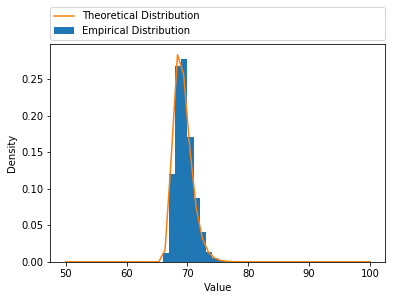

In [6]:
plt.hist(y, range=(50, 100), bins=50, density=True, label = 'Empirical Distribution')
plt.plot(x, largest_pdf, label = 'Theoretical Distribution')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [7]:
n_sample = 100
y = np.zeros(n_sample)
for i in range(n_sample):
    y[i] = np.max(np.random.binomial(100, 0.5, size=n_sample))
    
x = np.linspace(50, 100, 50)
largest_pdf = n_sample * norm.pdf(x, loc=50, scale=5) * (norm.cdf(x, loc=50, scale=5) ** (n_sample-1))

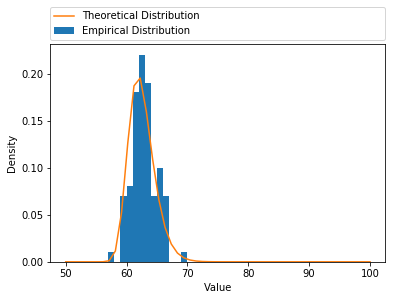

In [8]:
plt.hist(y, range=(50, 100), bins=50, density=True, label = 'Empirical Distribution')
plt.plot(x, largest_pdf, label = 'Theoretical Distribution')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Task 2-1 (Mutations only – Ignore the Parent)
Consider the same set 𝑆 = {0,1}^100 as before – we call it state space, now.

Write a Matlab code that starts with an initial all-zero state X𝑖𝑛𝑖 = (0,0, ... ). This is your initial individual.

In a loop, create 200 further generations. In order to create a new generation, take the current individual, and randomly flip one of its bits.

Repeat the whole experiment 1000 times and plot all the values, that is, the sum of the 100 components, versus the respective generation number in order to show how values evolve over time.

In a second plot, show the average progress made by the ensemble, that is, the difference between the new and the old mean value per generation – again versus the generation number.

Interpret: What do you expect? Compare your plot with some analytical expression if possible.

In [9]:
def evolve_1(n_generation, n_mutation):
    x = np.zeros(100)
    sum_generation = np.zeros(n_generation)
    imp_generation = np.zeros(n_generation)
    
    for i in range(n_generation):
        flip_indices = np.random.choice(x.shape[0], n_mutation, replace=False)

        imp_generation[i] = np.where(x[flip_indices] == 0, 1, -1)
        x[flip_indices] = np.where(x[flip_indices] == 0, 1, 0)
        sum_generation[i] = np.sum(x)
    
    return sum_generation, imp_generation

In [10]:
n_experiments = 1000
sum_record = np.zeros(shape=(1000, 200))
imp_record = np.zeros(shape=(1000, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_1(200, 1) 

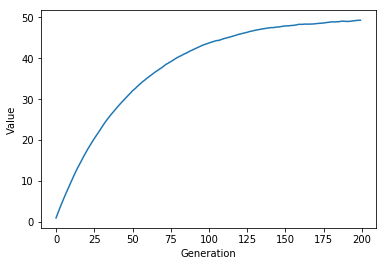

In [11]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

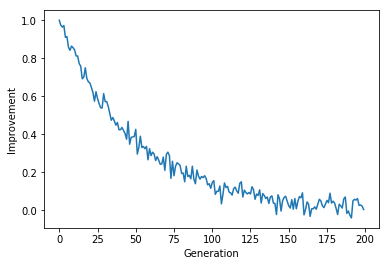

In [12]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.show()

## Task 2-2 (Mutations + Selection (Children plus Parent))
In the same way as above, study a slightly different scenario where a parent creates c children – each based on a single bit flip, and the new individual is best(children, parent). Create plots as in task 1 for c = 1, c = 3, and c = 5. Also plot our theory curves for the expected improvement per generation
𝐸[improvement] = 1 − (𝑘/𝑁)^𝑐 and compare.

In [13]:
def evolve_2(n_generation, n_children):
    x = np.zeros(100)
    sum_generation = np.zeros(n_generation)
    imp_generation = np.zeros(n_generation)
    
    for i in range(n_generation):
        flip_indices = np.random.choice(x.shape[0], n_children, replace=False)
        for index in flip_indices:
            
            imp_generation[i] = np.where(x[index] == 0, 1, 0)
            sum_generation[i] = np.sum(x) + imp_generation[i]
            
            if imp_generation[i] == 1:
                x[index] = 1
                break
    
    return sum_generation, imp_generation

In [14]:
# plot theoretical expectation (against number of correctness)
def plot_expectation(n_total, n_children):
    corrects = np.arange(n_total)
    expectation = 1 - (corrects / n_total) ** n_children
    
    plt.plot(corrects, expectation)

In [15]:
# plot theoretical expectation (against generation)
def plot_expectation_gen(record, n_children):
    
    expectation = 1 - ((record / 100) ** n_children)
    avg_imp = np.mean(expectation, axis = 0)
    plt.plot(avg_imp)

In [16]:
n_experiments = 2000
n_children = 1
sum_record = np.zeros(shape=(n_experiments, 200))
imp_record = np.zeros(shape=(n_experiments, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i]= evolve_2(200, n_children) 

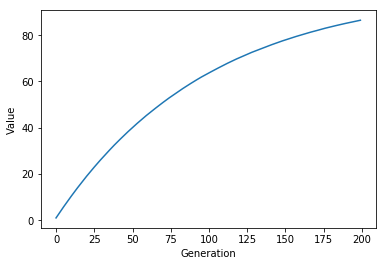

In [17]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

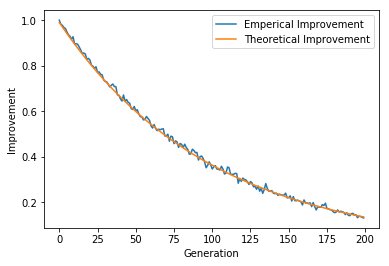

In [18]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plot_expectation_gen(sum_record, n_children)

plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['Emperical Improvement', 'Theoretical Improvement'])
plt.show()

In [19]:
# n_children is 3
n_experiments = 1000
n_children = 3
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_2(n_generation, n_children) 

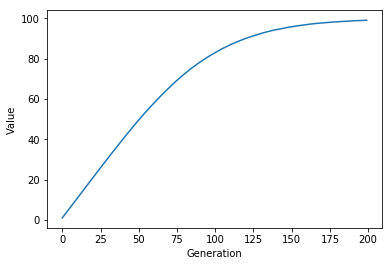

In [20]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

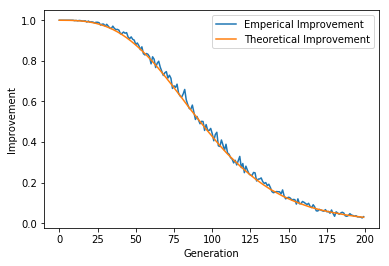

In [21]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plot_expectation_gen(sum_record, n_children)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['Emperical Improvement', 'Theoretical Improvement'])
plt.show()

In [22]:
# n_children is 5
n_experiments = 1000
n_children = 5
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_2(n_generation, n_children) 

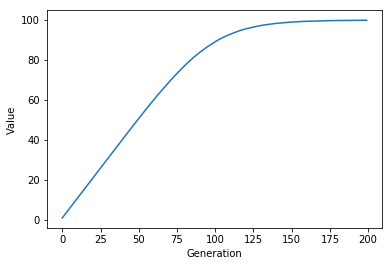

In [23]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

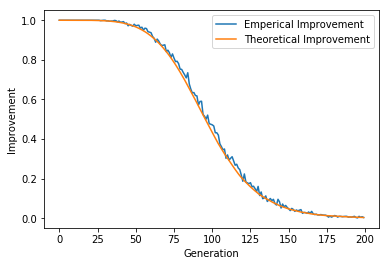

In [24]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plot_expectation_gen(sum_record, n_children)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['Emperical Improvement', 'Theoretical Improvement'])
plt.show()

## Task 2-3 (Larger Mutations + Selection (Children plus Parent))
Repeat task 2 but consider f bit flips rather than a single one. Summarize the consequences of such an enhanced mutation.

In [25]:
def evolve_3(generation, n_children, n_mutation):
    x = np.zeros(100)
    sum_generation = np.zeros(generation)
    imp_generation = np.zeros(generation)
    
    for i in range(generation):
        improvement, max_indices = 0, None
        for j in range(n_children):
            flip_indices = np.random.choice(x.shape[0], n_mutation, replace=False)

            improvement_j = np.sum(np.where(x[flip_indices] == 0, 1, 0))
            if improvement_j > improvement:
                improvement, max_indices = improvement_j, flip_indices
        
        if max_indices is not None:
            imp_generation[i] = improvement
            x[max_indices] = np.where(x[max_indices] == 0, 1, 0)
        
        sum_generation[i] = np.sum(x)
    
    return sum_generation, imp_generation

In [26]:
# n_children is 1 and n_mutation is 3
n_experiments = 1000
n_children = 1
n_mutation = 3
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_3(n_generation, n_children, n_mutation) 

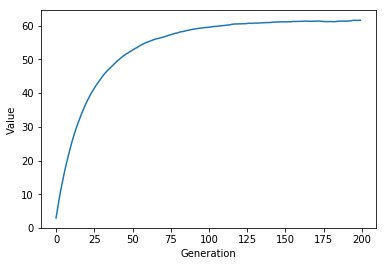

In [27]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

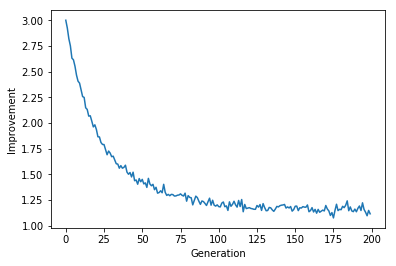

In [28]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.show()

In [29]:
# n_children is 3 and n_mutation is 3
n_experiments = 1000
n_children = 3
n_mutation = 3
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_3(n_generation, n_children, n_mutation) 

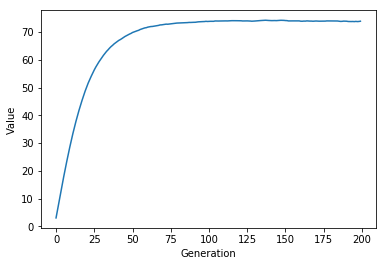

In [30]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

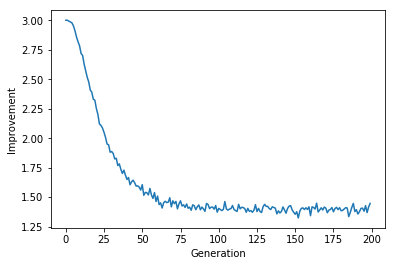

In [31]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.show()

In [32]:
# n_children is 5 and n_mutation is 3
n_experiments = 1000
n_children = 5
n_mutation = 3
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_3(n_generation, n_children, n_mutation) 

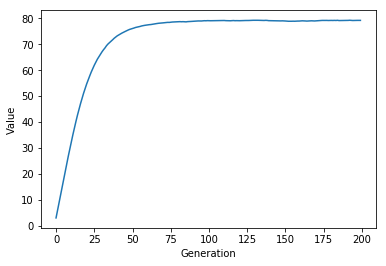

In [33]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

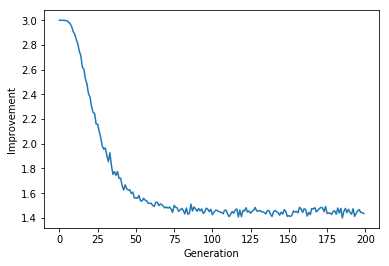

In [34]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.show()

In [35]:
def evolve_4(generation, n_children):
    x = np.zeros(100)
    sum_generation = np.zeros(generation)
    imp_generation = np.zeros(generation)
    
    for i in range(generation):
        improvement, max_indices = 0, None
        if i < 50:
            n_mutation = 3
        else:
            n_mutation = 1
        for j in range(n_children):
            flip_indices = np.random.choice(x.shape[0], n_mutation, replace=False)

            improvement_j = np.sum(np.where(x[flip_indices] == 0, 1, 0))
            if improvement_j > improvement:
                improvement, max_indices = improvement_j, flip_indices
        
        if max_indices is not None:
            imp_generation[i] = improvement
            x[max_indices] = np.where(x[max_indices] == 0, 1, 0)
        
        sum_generation[i] = np.sum(x)
    
    return sum_generation, imp_generation

In [36]:
# n_children is 5 and n_mutation is 3 before and 1 after 50th generation
n_experiments = 1000
n_children = 5
n_generation = 200
sum_record = np.zeros(shape=(n_experiments, n_generation))
imp_record = np.zeros(shape=(n_experiments, n_generation))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve_4(n_generation, n_children) 

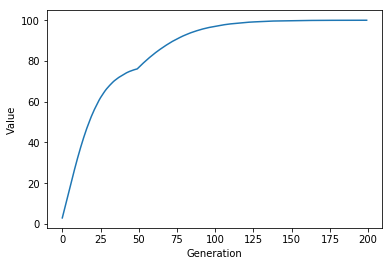

In [37]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

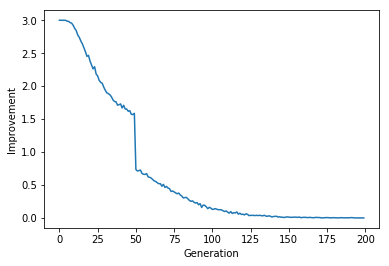

In [38]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.show()